# Preliminary Data Analytic Pipeline 
Provide a coded solution for each area below.  Where appropriate show output and explanations/insights.  Make sure it runs properly.
You will need to install the libraries below if required just

!pip install < lib >
* [pandas](https://pandas.pydata.org/)  
   * [Pandas Tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) 
   * [Pandas Example](https://towardsdatascience.com/30-examples-to-master-pandas-f8a2da751fa4)
* [numpy](https://numpy.org/) 
   * [Numpy Examples](https://numpy.org/doc/stable/user/quickstart.html)
* [scikit-learn with Examples](https://scikit-learn.org/stable) 
* [ydata_profiling](https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/overview.html)

In [18]:
!pip install pandas 
!pip install numpy 
!pip install scikit-learn 
!pip install ydata-profiling
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\dunca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\dunca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\dunca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\dunca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     ---------------------------------------- 0.2/99.8 MB 2.1 MB/s eta 0:00:49
     ---------------------------------------- 0.6/99.8 MB 4.8 MB/s eta 0:00:21
      --------------------------------------- 1.4/99.8 MB 8.1 MB/s eta 0:00:13
     - -------------------------------------- 2.6/99.8 MB 11.6 MB/s eta 0:00:09
     - -------------------------------------- 4.3/99.8 MB 16.1 MB/s eta 0:00:06
     - -------------------------------------- 4.3/99.8 MB 16.1 MB/s eta 0:00:06
     --- ------------------------------------ 7.6/99.8 MB 21.0 MB/s eta 0:00:05
     --- ------------------------------------ 9.5/99.8 MB 23.4 MB/s eta 0:00:04
     ---- ---------------------------------- 11.0/99.8 MB 32.7 MB/s eta 0:00:03
     ----- --------------------------------- 12.9/99.8 MB 38.6 MB/s eta 0:00:03
     ----- --------------------------------- 15.1/99.8 MB 4


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\dunca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

## Data Integration
Use the fraud data set introduced earlier in the course

In [4]:
# data integration
df = pd.read_csv("transactions.csv")

## Format and Type
Determine the format of the file and the types of each feature.

In [5]:
## format and type
print("Format of data is csv")
print(df.shape)
df.head()

Format of data is csv
(1852394, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
sex                       object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

## Analysis
Determine the dynamics of each feature (int/float - math stats, text - categorical or not)

In [7]:
# analysis
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,9.261965e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,5.347402e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,4.630982e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,9.261965e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,1.389295e+06,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.852393e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
textColumns = df.select_dtypes(include=object)
categorical = []
notcategorical = []
for col in textColumns.columns:
    if(df[col].nunique() < 1000): #Determine if there are a lot of unique values or not (identifying categorical data)
        categorical.append(col)
    else:
        notcategorical.append(col)
print("Columns that are categorical: ", categorical)
print("Columns that are not categorical: ", notcategorical)

Columns that are categorical:  ['merchant', 'category', 'first', 'last', 'sex', 'street', 'city', 'state', 'job', 'dob']
Columns that are not categorical:  ['trans_date_trans_time', 'trans_num']


## Clean up
* Find and List number of blank entries and outliers/errors
* Take corrective actions and provide justification
* Remove unnecessary features
* If a categorical approach breakout the input features (X) from the output features (y)

In [9]:
# Clean up
blank_entries = df.isnull().sum()
print("Number of blank entries per column:\n", blank_entries)

Number of blank entries per column:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
sex                      0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [10]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns
data_numeric = df[numerical_cols]
z_scores = scaler.fit_transform(data_numeric)
z_score_df = pd.DataFrame(z_scores, columns=numerical_cols)
mask = (np.abs(z_score_df) <= 3).all(axis=1)
outliers = (np.abs(z_score_df) > 3).any(axis=1)
print("Outlier indices:", outliers)

Outlier indices: 0          False
1          False
2          False
3          False
4          False
           ...  
1852389    False
1852390    False
1852391    False
1852392    False
1852393    False
Length: 1852394, dtype: bool


In [11]:
df = df_cleaned

NameError: name 'df_cleaned' is not defined

In [12]:
df.drop(['Unnamed: 0', 'trans_num'], axis=1, inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


## Normalize
Dont worry about text features but you must normalize the numeric features. 
* Provide rationale as to why the particular normalization feature was selected.

In [20]:
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df_numerical = df[numerical_cols]

for col in df_numerical.columns:
    df_norm = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

df.update(df_norm)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,5.414540e-04,"fraud_Rippin, Kub and Mann",misc_net,0.000137,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0.277680,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,0.000000e+00,0.350307,0.848603,0
1,2019-01-01 00:00:44,1.141762e-07,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.003670,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0.992287,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,4.116637e-07,0.621490,0.486209,0
2,2019-01-01 00:00:51,7.771712e-06,fraud_Lind-Buckridge,entertainment,0.007569,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0.831053,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,5.224962e-07,0.497563,0.546698,0
3,2019-01-01 00:01:16,7.078903e-04,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.001520,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0.591655,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,9.183266e-07,0.577666,0.542621,0
4,2019-01-01 00:03:06,7.520988e-05,fraud_Keeling-Crist,misc_pos,0.001415,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0.234898,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,2.659981e-06,0.405248,0.882857,0


I chose this method of normalization as I already removed outliers/errors so using z_score as a normalization method wouldnt make sense.

## Feature and Label Selection
Down select from your data, the input features and label(s)

In [21]:
X = df.drop('is_fraud', axis=1)  # Input features
y = df['is_fraud']  # Output feature

In [33]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming X is your DataFrame containing the features

# Convert 'trans_date_trans_time' to datetime, then to Unix timestamp
X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time']).astype('int64') / 10**9

# Initialize LabelEncoders
le_merchant = LabelEncoder()
le_category = LabelEncoder()

# Apply LabelEncoding to categorical features
X['merchant'] = le_merchant.fit_transform(X['merchant'])
X['category'] = le_category.fit_transform(X['category'])

In [34]:
# Set up the input features (X) and the assocated label(s) (y)
selected_features =["trans_date_trans_time", "merchant", "category", "amt", "unix_time"]
X = X[selected_features] #Further narrows down the selected features of X
y = y #uses the earlier selected 'is_fraud' for the output

## Split into 3 data sets for training, validation, and test (Explain your % for each)

In [35]:
# Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1296675, 5)
(277860, 5)
(277859, 5)


C:\Users\dunca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.10151
[1]	validation_0-logloss:0.07639
[2]	validation_0-logloss:0.05841
[3]	validation_0-logloss:0.04499
[4]	validation_0-logloss:0.03542
[5]	validation_0-logloss:0.02850
[6]	validation_0-logloss:0.02346
[7]	validation_0-logloss:0.01980
[8]	validation_0-logloss:0.01712
[9]	validation_0-logloss:0.01511
[10]	validation_0-logloss:0.01362
[11]	validation_0-logloss:0.01258
[12]	validation_0-logloss:0.01174
[13]	validation_0-logloss:0.01112
[14]	validation_0-logloss:0.01066
[15]	validation_0-logloss:0.01034
[16]	validation_0-logloss:0.01009
[17]	validation_0-logloss:0.00987
[18]	validation_0-logloss:0.00973
[19]	validation_0-logloss:0.00963
[20]	validation_0-logloss:0.00954
[21]	validation_0-logloss:0.00949
[22]	validation_0-logloss:0.00944
[23]	validation_0-logloss:0.00941
[24]	validation_0-logloss:0.00934
[25]	validation_0-logloss:0.00931
[26]	validation_0-logloss:0.00931
[27]	validation_0-logloss:0.00927
[28]	validation_0-logloss:0.00926
[29]	validation_0-loglos

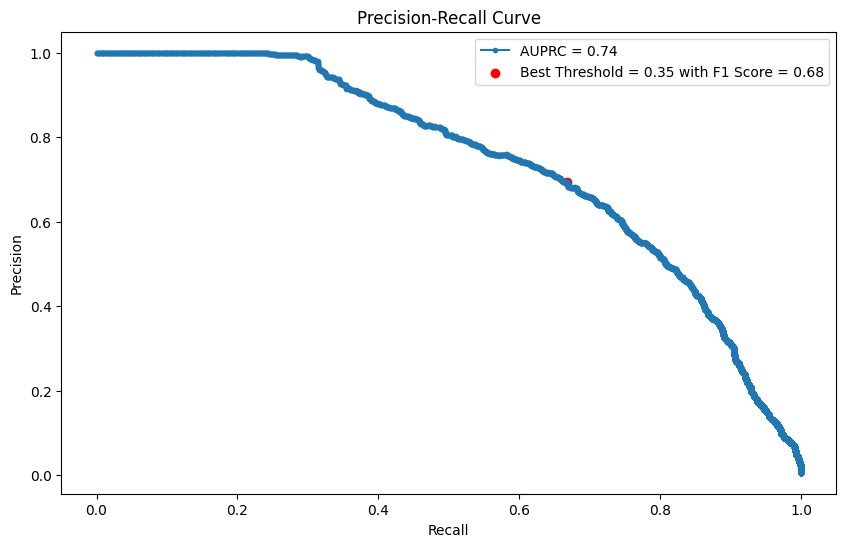

Best F1 Score: 0.6805 at Threshold: 0.35
Area Under the PR Curve (AUPRC): 0.7419


In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, auc, f1_score
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined

# Initialize the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)

# Predict probabilities on the test set
y_probs = model.predict_proba(X_test)[:, 1]  # get the probability of being fraud

# Calculate precision and recall for various threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
# Find the threshold that maximizes F1 score
best_threshold = thresholds[f1_scores.argmax()]
best_f1_score = f1_scores.max()

# Calculate the Area Under the PR Curve (AUPRC)
auprc = auc(recall, precision)

# Plotting Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {auprc:.2f}')
plt.scatter(recall[f1_scores.argmax()], precision[f1_scores.argmax()], marker='o', color='red', 
            label=f'Best Threshold = {best_threshold:.2f} with F1 Score = {best_f1_score:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Print the best F1 score and the corresponding threshold
print(f'Best F1 Score: {best_f1_score:.4f} at Threshold: {best_threshold:.2f}')
print(f'Area Under the PR Curve (AUPRC): {auprc:.4f}')

This results in 70% training, 15% validation, and 15% test splits.
The reason I chose 70% for training is because to train an AI/ML to understand data it needs as much data as possible
I chose 15% for validation as this will give me a good baseline for how good/bad my ML is trained
I chose 15% for testing as this ensures there is enough test data without hindering my validation and training data 

## Summary
# Provide your thoughts on the quality, amount, trustworthiness, diffencencies, timeliness, and available documentation on the data you selected.  This can be written and/or code to demonstrate your conclusions.
* Determine if the data selected is suitable for a machine learning ingest.
* Note there are other prepossessing steps depending on the data such as graphics, free form text, and graphs and/or the type of model such as a time series model.  These topics are covered in the upcoming modules.

# Quality Check
After your analysis provide details on the following qualities of your selected data.
* Overall Quality of the data
* Sufficient amount of the data
* Spareness of any data categories (eg. no young adults)
* Trustworthiness of the data (Is it true?)
* Timeliness of the data (is it recent?)  What might be the problem if it is not?
* Note difficenties
* Available document on the data types, how the data was collected, how it was verified?

Provide your answers here for the quality check...

I think the dataselecton is suitable for a machine learning ingest. \
Quality: The dataset had no missing information or too many outliers leading me to believe the quality of this dataset isn't terrible. \
Amount: the dataset has over 1 million datapoints giving a machine learning algorithm a lot to train on. \
Trustworthiness: As this is a dataset given for this I would hope that we can trust the data within it \
Difficencies: Generic unnamed: 0 column did not need to be included, Certain features have high cardinality that may cause issues for the ML algorithm to truly grasp \
Timeliness: This data is from 5 years ago, it may not be accurate to how credit card fraud is detected today, but as this is only data for possible credit card fraud (and credit cards havent changed too much in the USA) it more than likely will still be accurate